In [2]:
import os, glob
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
import soundfile
import keras
from keras import layers
%matplotlib inline

Using TensorFlow backend.


In [201]:
def extract_feature(file_name, stft, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        result=np.array([])
        empty=np.zeros((257,173))
        if stft:
            stft=np.abs(librosa.stft(X,n_fft=512))
            empty=np.stack((empty,stft),axis=0)
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=12).T,axis=0) 
            result=np.hstack((result,mfccs))
        if chroma:
            st=np.abs(librosa.stft(X,n_fft=512))
            chroma=np.mean(librosa.feature.chroma_stft(S=st, sr=sample_rate).T,axis=0)
            
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
          
    return empty


In [202]:
def load_train_data():
   
    for file in glob.glob("C:\\Users\\ashish\\Downloads\\sc09\\sc09\\eighttrain\\*.wav"):
        print(file)
        stft=extract_feature(file,stft=True, mfcc=False, chroma=False, mel=False)
        
    return stft

In [203]:
x_train=load_train_data()


C:\Users\ashish\Downloads\sc09\sc09\eighttrain\Eight_004ae714_nohash_0.wav


ValueError: all input arrays must have the same shape

In [77]:
x_train.shape

(257, 126)

WAV file:  Fs = 16000, x.shape = (12, 158), x.dtype = float64


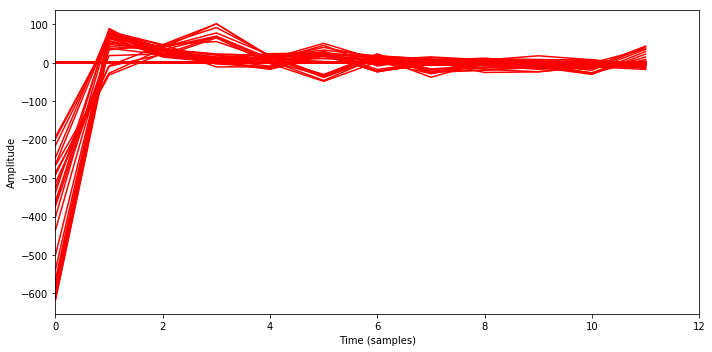

In [58]:
def print_plot_play(x, Fs, text=''):
   
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(10, 5))
    plt.plot(x, color='red')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    #ipd.display(ipd.Audio(data=x, rate=Fs))
print_plot_play(x=x_train, Fs=16000, text='WAV file: ')


(None, (12, 44))

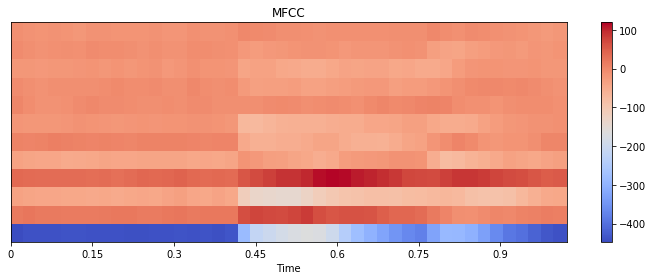

In [55]:
data,sr=librosa.load('C:/Users/ashish/Downloads/sc09/sc09/train/Eight_00b01445_nohash_0.wav')
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=12)

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout(),mfccs.shape

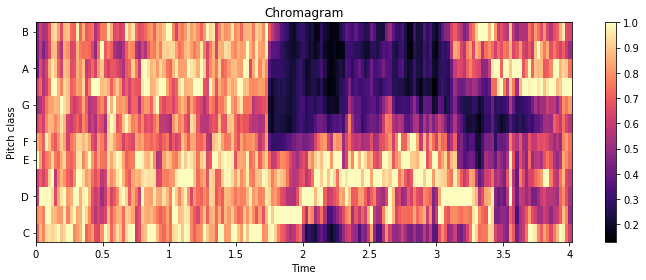

(None, (12, 173))

In [52]:
data,sr=librosa.load('C:/Users/ashish/Downloads/sc09/sc09/train/Eight_00b01445_nohash_0.wav')

S = np.abs(librosa.stft(data, n_fft=512))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show(),chroma.shape

In [ ]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train - mean)/std




In [34]:
a=np.array([[1,2],[2,3]])
a

array([[1, 2],
       [2, 3]])

In [35]:
b=np.array([[]])
b

array([], shape=(1, 0), dtype=float64)

In [147]:
np.concatenate(a,b,axis=0)

TypeError: Argument given by name ('axis') and position (2)

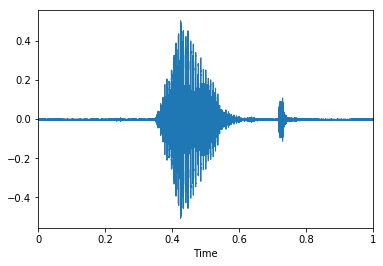

In [191]:
import matplotlib.pyplot as plt
import librosa.display
data,sr=librosa.load('C:/Users/ashish/Downloads/sc09/sc09/train/Eight_b9f46737_nohash_2.wav')

librosa.display.waveplot(data, sr=sr)
stft=np.abs(librosa.stft(data,n_fft=512))
#

In [192]:
stft.shape

(257, 173)

In [36]:
stft

array([[9.57145169e-03, 6.40550768e-03, 2.32936791e-03, ...,
        5.75575861e-04, 2.06130999e-03, 4.54703765e-03],
       [7.17678573e-03, 3.18946014e-03, 2.10028281e-03, ...,
        6.71715592e-04, 1.27261423e-03, 3.87870404e-03],
       [1.49002597e-02, 5.41773811e-03, 3.96988867e-03, ...,
        3.48918955e-03, 2.15785438e-03, 7.22089270e-03],
       ...,
       [6.63861749e-04, 3.31866671e-04, 1.04603775e-08, ...,
        1.97692529e-09, 2.77310228e-05, 8.77955026e-05],
       [6.63451268e-04, 3.31773452e-04, 1.32529268e-08, ...,
        8.36725622e-09, 2.77254949e-05, 8.78282663e-05],
       [6.63634215e-04, 3.31731368e-04, 6.28855235e-09, ...,
        9.66562119e-09, 2.77253039e-05, 8.77793209e-05]], dtype=float32)

In [37]:
res=stft
res


array([[9.57145169e-03, 6.40550768e-03, 2.32936791e-03, ...,
        5.75575861e-04, 2.06130999e-03, 4.54703765e-03],
       [7.17678573e-03, 3.18946014e-03, 2.10028281e-03, ...,
        6.71715592e-04, 1.27261423e-03, 3.87870404e-03],
       [1.49002597e-02, 5.41773811e-03, 3.96988867e-03, ...,
        3.48918955e-03, 2.15785438e-03, 7.22089270e-03],
       ...,
       [6.63861749e-04, 3.31866671e-04, 1.04603775e-08, ...,
        1.97692529e-09, 2.77310228e-05, 8.77955026e-05],
       [6.63451268e-04, 3.31773452e-04, 1.32529268e-08, ...,
        8.36725622e-09, 2.77254949e-05, 8.78282663e-05],
       [6.63634215e-04, 3.31731368e-04, 6.28855235e-09, ...,
        9.66562119e-09, 2.77253039e-05, 8.77793209e-05]], dtype=float32)

In [197]:
a=np.array([[0,0],[3,5],[5,6]])
b=np.array([[1,3],[1,4],[7,8]])
z=np.array([])

a.shape,b.shape

((3, 2), (3, 2))

In [198]:
z=np.append(a,b,axis=1)
z.shape,z

((3, 4), array([[0, 0, 1, 3],
        [3, 5, 1, 4],
        [5, 6, 7, 8]]))

In [199]:
z=np.stack((a,b),axis=0)
z.shape,z

((2, 3, 2), array([[[0, 0],
         [3, 5],
         [5, 6]],
 
        [[1, 3],
         [1, 4],
         [7, 8]]]))

In [160]:
a

array([[2, 3],
       [3, 5],
       [5, 6]])

In [162]:
a_old=a

In [163]:
a_old

array([[2, 3],
       [3, 5],
       [5, 6]])

In [164]:
new=np.stack(a_old,axis=0)
new

array([[2, 3],
       [3, 5],
       [5, 6]])

In [204]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])